In [59]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import csv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
fpath1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Discovery.h5ad"
adata1=sc.read(fpath1)  

fpath2="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Replication.h5ad"
adata2=sc.read(fpath2) 

In [137]:
adata1.obs.age.describe()

count    181783.000000
mean         40.480259
std          13.322257
min          20.000000
25%          31.000000
50%          37.000000
75%          48.000000
max          76.000000
Name: age, dtype: float64

In [138]:
adata2.obs.age.describe()

count    254551.000000
mean         49.928443
std          15.747269
min          23.000000
25%          40.000000
50%          47.000000
75%          63.000000
max          79.000000
Name: age, dtype: float64

In [143]:
check=pd.cut(x=adata1.obs.age, bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], right=False)
isnan(check)

NameError: name 'isnan' is not defined

In [114]:
#df1=adata1.obs[['sanger_sample_id', "disease_status"]].drop_duplicates().reset_index().drop(columns="index")
#df2=adata2.obs[['sanger_sample_id', "disease_status"]].drop_duplicates().reset_index().drop(columns="index")
#df3=pd.concat([df1, df2])
#df3['disease_status']=df3['disease_status'].replace({'cd': 'CD', 'healthy': 'H'})
#id_count = {'CD':0, 'H':0}
#list_of_ids = []
#for index, row in df3.iterrows():
#    if row['disease_status'] in id_count:
#        key = row['disease_status']
#        list_of_ids.append(f"{key}{id_count[key] + 1}")
#        id_count[key] = id_count[key] + 1
#df3['sample_id'] = list_of_ids
#df3=df3.drop(columns="disease_status")


In [115]:
#adata1.obs=adata1.obs.merge(df3, left_on='sanger_sample_id', right_on='sanger_sample_id').copy()
#adata2.obs=adata2.obs.merge(df3, left_on='sanger_sample_id', right_on='sanger_sample_id').copy()

In [116]:
#for i in adata1.obs.keys():
#    print(i)

In [117]:
vec=[  
    'sanger_sample_id',#Patient information - this will be renamed to CD1, CD2, H1, H2
    #'sample_id', 
    'disease_status',
     'biopsy_type', 
    'age',
    'age_imputed',
     'sex',
     'inflammation_status',
      'smoking_status',    
    
    'bead_version',# Sample processing information
      'bead_lot',
    'chip_version',
    'chip_lot', 
 #   'id_run',   
    'lane', 
 #   'library_id',
     'enzyme_lot_blp', 
     'gem_lot',  
    
     'early_late_ratio' #Epithelial/immune ratio
       
#     'log1p_n_genes_by_counts',  # QC metrics
#     'log1p_total_counts',
#      'n_genes_by_counts',
#       'normalization_factor', 
#      'pct_counts_gene_group__mito_transcript',
#        'cell_passes_qc' , 
   
 #      'scrublet__multiplet_scores',  # Multiplet information
 #      'scrublet__predicted_multiplet', 
        
       #'label__machine',
#       'predicted_celltype', #Cell annotations
#       'predicted_celltype_probability'
]

In [118]:
df1=adata1.obs[vec].copy()
df2=adata2.obs[vec].copy()

df1=df1.reset_index()
df2=df2.reset_index()

df1=df1.drop(columns=['index']).drop_duplicates()
df2=df2.drop(columns=['index']).drop_duplicates()

df1['cohort']="Discovery"
df2['cohort']="Replication"

In [119]:
#df1['order']=df1.sample_id.str.extract('(\d+)',  expand = True)
#df2['order']=df2.sample_id.str.extract('(\d+)',  expand = True)
#df1['order']=pd.to_numeric(df1.order)
#df2['order']=pd.to_numeric(df2.order)

#h1=df1[['sample_id', "disease_status", "order"]].groupby(['disease_status']).apply(lambda x: x.sort_values(["order"], ascending = True)).reset_index(drop=True)
#h2=df2[['sample_id', "disease_status", "order"]].groupby(['disease_status']).apply(lambda x: x.sort_values(["order"], ascending = True)).reset_index(drop=True)

#h1['order1'] = np.arange(0, h1.shape[0])
#h2['order1'] = np.arange(0, h2.shape[0])

#h1['order1']=pd.to_numeric(h1.order1)
#h2['order1']=pd.to_numeric(h2.order1)

#df1=df1.merge(h1[['sample_id','order1']], on='sample_id')
#df2=df2.merge(h2[['sample_id','order1']], on='sample_id')

#df1=df1.sort_values(by="order1")
#df2=df2.sort_values(by="order1")

#df1.drop(columns=["order", "order1"], inplace=True)
#df2.drop(columns=["order", "order1"], inplace=True)

#df2=df2.groupby(['cohort', 'disease_status'])

In [121]:
sample_metadata=pd.concat([df1, df2])

sample_metadata['disease_status']=sample_metadata['disease_status'].replace({'cd': "Crohn's disease", 'healthy': 'Healthy'})
sample_metadata['biopsy_type']=sample_metadata['biopsy_type'].replace({'TI': "terminal ileum"})

#sample_metadata['age_range']=pd.cut(x=sample_metadata.age, bins=[0, 20, 40, 60, 80], right=False)
sample_metadata.rename(columns={"early_late_ratio": "f1_f2_ratio"}, inplace=True)

sample_metadata.gem_lot.replace('UNKNOWN_GEM_1', np.nan, inplace=True)
sample_metadata.f1_f2_ratio.replace(np.nan, 'no_fractionation', inplace=True)

# We will use age_imputed instead of age (which pre-calculated mean of ages of samples with missing age)
sample_metadata.drop(columns=["age"], inplace=True)
#sample_metadata.loc[sample_metadata.sanger_sample_id=='OTARscRNA9294497',"age"]=56
#sample_metadata.loc[sample_metadata.sanger_sample_id=='OTARscRNA9294498',"age"]=57
sample_metadata.rename(columns={"age_imputed": "age"}, inplace=True)

In [125]:
# We need to fill medication class from another sample phenotype metadata spreadsheet
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/figures/data/GUT_scRNAseq-cleaned.csv"
meta=pd.read_csv(fpath, sep=',')
meta=meta[['sanger_sample_id', 'medication_class']]
meta=meta[meta.sanger_sample_id.isin(sample_metadata.sanger_sample_id)]
sample_metadata=sample_metadata.merge(meta, how='left', on='sanger_sample_id')

sample_metadata['medication_class'].replace('Anti-TNF (adalimumab-infliximab-golimumab)', 'Anti-TNF', inplace=True)
sample_metadata['medication_class'].replace('Immunosuppressants (azathioprine-mercaptopurine-methotrexate)', 'Immunosuppressants', inplace=True)
sample_metadata['medication_class'].replace('Anti-TNF+Immunosuppressant', 'Anti-TNF + Immunosuppressants', inplace=True)
sample_metadata['medication_class'].replace('Corticosteriods (prednisolone-budesonide)', 'Corticosteriods', inplace=True)
sample_metadata['medication_class'].replace('5-ASA drugs (mesalazine)', '5-ASA drugs', inplace=True)

In [129]:
#Reorder metadata columns
v1=['cohort', 'sanger_sample_id', 'disease_status', 'sex', 'age', 'inflammation_status','medication_class', 'smoking_status']
sample_metadata=pd.concat([sample_metadata[v1], sample_metadata.drop(columns=v1)], axis=1)

#Reorder metadata rows
sample_metadata.sort_values(['cohort', 'disease_status'], ascending=[True, False], inplace=True)

In [130]:
sample_metadata.to_csv("sample_metadata.csv", sep=",", index=False) 

In [109]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency 
import os
import pandas
import seaborn as sns

In [85]:
#Discovery
df11=df1[df1.disease_status=="Crohn's disease"]
df111=df1[df1.disease_status=="Healthy"]

In [86]:
#Replication
df22=df2[df2.disease_status=="Crohn's disease"]
df222=df2[df2.disease_status=="Healthy"]

In [87]:
c1=pandas.crosstab(df11.age_range, df11.sex, margins=True)
c1.drop(index="All", inplace=True)
c1=c1.stack().reset_index(name='Freq')
c1['disease_status']="Crohn's disease"

c11=pandas.crosstab(df111.age_range, df111.sex, margins=True)
c11.drop(index="All", inplace=True)
c11=c11.stack().reset_index(name='Freq')
c11['disease_status']="Healthy"

c111=pd.concat([c1, c11])
c111['cohort']="Discovery"

In [88]:
c1=pandas.crosstab(df22.age_range, df22.sex, margins=True)
c1.drop(index="All", inplace=True)
c1=c1.stack().reset_index(name='Freq')
c1['disease_status']="Crohn's disease"

c11=pandas.crosstab(df222.age_range, df222.sex, margins=True)
c11.drop(index="All", inplace=True)
c11=c11.stack().reset_index(name='Freq')
c11['disease_status']="Healthy"

c222=pd.concat([c1, c11])
c222['cohort']="Replication"

In [89]:
c333=pd.concat([c111, c222])

In [90]:
c333

,age_range,sex,Freq,disease_status,cohort
0,"[20, 40)",F,9,Crohn's disease,Discovery
1,"[20, 40)",M,12,Crohn's disease,Discovery
2,"[20, 40)",All,21,Crohn's disease,Discovery
3,"[40, 60)",F,2,Crohn's disease,Discovery
4,"[40, 60)",M,2,Crohn's disease,Discovery
5,"[40, 60)",All,4,Crohn's disease,Discovery
6,"[60, 80)",F,1,Crohn's disease,Discovery
7,"[60, 80)",M,0,Crohn's disease,Discovery
8,"[60, 80)",All,1,Crohn's disease,Discovery
0,"[20, 40)",F,5,Healthy,Discovery


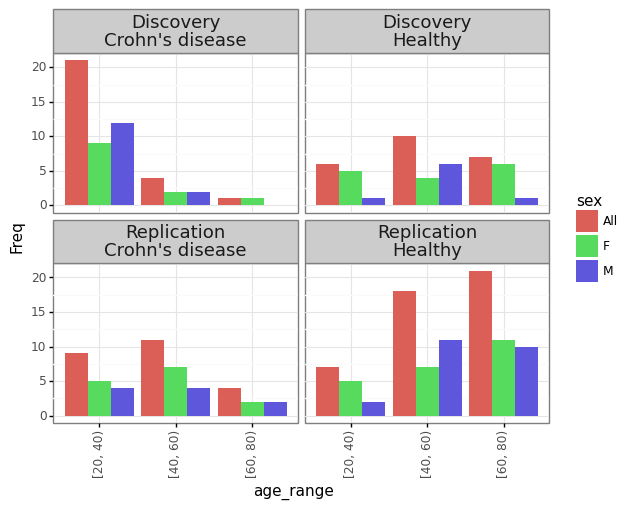

<ggplot: (8742252323965)>

In [91]:
gplt = plt9.ggplot(c333, plt9.aes(x='age_range', y='Freq', fill='sex')) 
gplt = gplt + plt9.theme_bw()
gplt = gplt + plt9.geom_bar(position = "dodge", stat='identity') + plt9.scale_x_discrete(drop=False)
gplt = gplt + plt9.theme(axis_text_x = plt9.element_text(angle = 90)) + plt9.scale_fill_discrete(drop=False)
#gplt = gplt + plt9.ggtitle("Healthy")
#gplt = gplt + plt9.geom_text(plt9.aes(label='nr_cells'), size=7, nudge_y=0.125,va='bottom')
gplt = gplt + plt9.facet_wrap(['cohort', 'disease_status'])
gplt = gplt + plt9.theme(strip_text_x = plt9.element_text(size = 13))
#plt9.ggsave(plot=gplt, filename="Nr_cells" , width = 17,height = 5) 
gplt

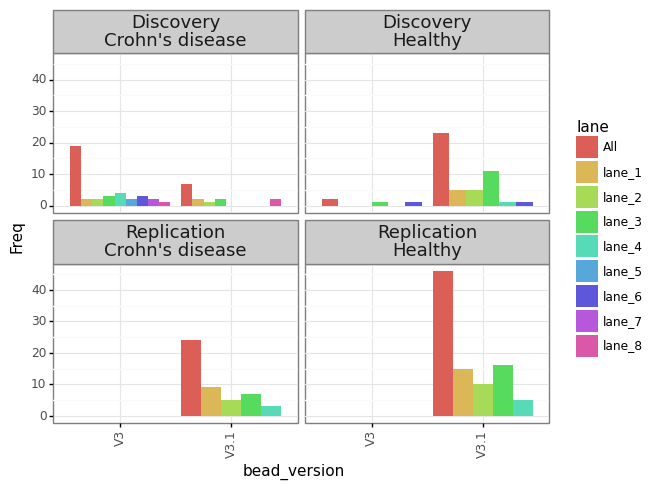

<ggplot: (8742352840165)>

In [92]:
c1=pandas.crosstab(df11.bead_version, df11.lane, margins=True)
c1.drop(index="All", inplace=True)
c1=c1.stack().reset_index(name='Freq')
c1['disease_status']="Crohn's disease"

c11=pandas.crosstab(df111.bead_version, df111.lane, margins=True)
c11.drop(index="All", inplace=True)
c11=c11.stack().reset_index(name='Freq')
c11['disease_status']="Healthy"

c111=pd.concat([c1, c11])
c111['cohort']="Discovery"


c1=pandas.crosstab(df22.bead_version, df22.lane, margins=True)
c1.drop(index="All", inplace=True)
c1=c1.stack().reset_index(name='Freq')
c1['disease_status']="Crohn's disease"

c11=pandas.crosstab(df222.bead_version, df222.lane, margins=True)
c11.drop(index="All", inplace=True)
c11=c11.stack().reset_index(name='Freq')
c11['disease_status']="Healthy"

c222=pd.concat([c1, c11])
c222['cohort']="Replication"


c333=pd.concat([c111, c222])


gplt = plt9.ggplot(c333, plt9.aes(x='bead_version', y='Freq', fill='lane')) 
gplt = gplt + plt9.theme_bw()
gplt = gplt + plt9.geom_bar(position = "dodge", stat='identity') + plt9.scale_x_discrete(drop=False)
gplt = gplt + plt9.theme(axis_text_x = plt9.element_text(angle = 90)) + plt9.scale_fill_discrete(drop=False)
#gplt = gplt + plt9.ggtitle("Healthy")
#gplt = gplt + plt9.geom_text(plt9.aes(label='nr_cells'), size=7, nudge_y=0.125,va='bottom')
gplt = gplt + plt9.facet_wrap(['cohort', 'disease_status'])
gplt = gplt + plt9.theme(strip_text_x = plt9.element_text(size = 13))
#plt9.ggsave(plot=gplt, filename="Nr_cells" , width = 17,height = 5) 
gplt